# Práctica 1, exploración de datos
### Exploración inicial de los conjuntos de datos de la tarea 04
##### Alberto Isaac Pico Lara

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import plotly
import missingno as msno
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',500)

### Conjunto de datos de los precios de mercado de las principales criptomonedas
[https://www.kaggle.com/philmohun/cryptocurrency-financial-data]

In [2]:
df_crypto = pd.read_csv('..\Conjuntos de datos\consolidated_coin_data.csv', sep = ',', encoding = 'utf8')

In [3]:
df_crypto.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,"46,048,752","824,588,509"
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,"41,462,224","853,213,342"
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,"27,574,097","817,872,179"
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,"24,127,567","828,296,390"
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,"28,706,667","879,181,680"


In [4]:
df_crypto.tail()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
28939,bitcoin-sv,"May 02, 2013",3.78,4.04,3.01,3.37,0,"58,287,979"
28940,bitcoin-sv,"May 01, 2013",4.29,4.36,3.52,3.80,0,"65,604,596"
28941,bitcoin-sv,"Apr 30, 2013",4.40,4.57,4.17,4.30,0,"74,020,918"
28942,bitcoin-sv,"Apr 29, 2013",4.37,4.57,4.23,4.38,0,"75,388,964"
28943,bitcoin-sv,"Apr 28, 2013",4.30,4.40,4.18,4.35,0,"74,636,938"


In [5]:
df_crypto.shape

(28944, 8)

In [6]:
columnas = df_crypto.columns.values.tolist()
columnas

['Currency', 'Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [7]:
df_crypto.dtypes

Currency      object
Date          object
Open          object
High          object
Low           object
Close         object
Volume        object
Market Cap    object
dtype: object

In [8]:
df_crypto['Volume'] = df_crypto['Volume'].str.replace(',', '')
df_crypto['Market Cap'] = df_crypto['Market Cap'].str.replace(',', '')
df_crypto['Open'] = df_crypto['Open'].str.replace(',', '')
df_crypto['High'] = df_crypto['High'].str.replace(',', '')
df_crypto['Low'] = df_crypto['Low'].str.replace(',', '')
df_crypto['Close'] = df_crypto['Close'].str.replace(',', '')

In [9]:
df_crypto.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
0,tezos,"Dec 04, 2019",1.29,1.32,1.25,1.25,46048752,824588509
1,tezos,"Dec 03, 2019",1.24,1.32,1.21,1.29,41462224,853213342
2,tezos,"Dec 02, 2019",1.25,1.26,1.20,1.24,27574097,817872179
3,tezos,"Dec 01, 2019",1.33,1.34,1.25,1.25,24127567,828296390
4,tezos,"Nov 30, 2019",1.31,1.37,1.31,1.33,28706667,879181680


In [10]:
columnas_numericas = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [11]:
df_crypto[columnas_numericas] = df_crypto[columnas_numericas].astype(float)

In [12]:
df_crypto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28944 entries, 0 to 28943
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Currency    28944 non-null  object 
 1   Date        28944 non-null  object 
 2   Open        28944 non-null  float64
 3   High        28944 non-null  float64
 4   Low         28944 non-null  float64
 5   Close       28944 non-null  float64
 6   Volume      28944 non-null  float64
 7   Market Cap  28944 non-null  float64
dtypes: float64(6), object(2)
memory usage: 1.8+ MB


In [13]:
df_crypto.isnull().any().any()

False

In [14]:
df_crypto.replace({' ': np.nan}, inplace = True)

In [15]:
df_crypto.isnull().any().any()

False

In [16]:
list(df_crypto['Currency'].unique())

['tezos',
 'binance-coin',
 'eos',
 'bitcoin',
 'tether',
 'xrp',
 'bitcoin-cash',
 'stellar',
 'litecoin',
 'ethereum',
 'cardano',
 'bitcoin-sv']

In [17]:
df_crypto.groupby('Currency').count()

,Date,Open,High,Low,Close,Volume,Market Cap
Currency,,,,,,,
binance-coin,2412,2412,2412,2412,2412,2412,2412
bitcoin,2412,2412,2412,2412,2412,2412,2412
bitcoin-cash,2412,2412,2412,2412,2412,2412,2412
bitcoin-sv,2412,2412,2412,2412,2412,2412,2412
cardano,2412,2412,2412,2412,2412,2412,2412
eos,2412,2412,2412,2412,2412,2412,2412
ethereum,2412,2412,2412,2412,2412,2412,2412
litecoin,2412,2412,2412,2412,2412,2412,2412
stellar,2412,2412,2412,2412,2412,2412,2412


## El interés de la exploración se centrará en Bitcoin y XRP

In [18]:
solo_xrp = df_crypto[df_crypto['Currency'] == 'xrp']
solo_xrp.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
12060,xrp,"Dec 04, 2019",0.219824,0.221770,0.212603,0.216348,1.427313e+09,9.364746e+09
12061,xrp,"Dec 03, 2019",0.219516,0.223179,0.216675,0.219870,1.017648e+09,9.517202e+09
12062,xrp,"Dec 02, 2019",0.225386,0.227203,0.217283,0.219581,1.187514e+09,9.507819e+09
12063,xrp,"Dec 01, 2019",0.226466,0.226525,0.220253,0.225333,1.176237e+09,9.756884e+09
12064,xrp,"Nov 30, 2019",0.230232,0.233615,0.224546,0.226474,1.160033e+09,9.806316e+09


In [19]:
solo_bitcoin = df_crypto[df_crypto['Currency']  == 'bitcoin']
solo_bitcoin.head()

,Currency,Date,Open,High,Low,Close,Volume,Market Cap
7236,bitcoin,"Dec 04, 2019",7320.13,7539.78,7170.92,7252.03,2.166424e+10,1.311431e+11
7237,bitcoin,"Dec 03, 2019",7323.98,7418.86,7229.36,7320.15,1.479749e+10,1.323599e+11
7238,bitcoin,"Dec 02, 2019",7424.04,7474.82,7233.40,7321.99,1.708204e+10,1.323790e+11
7239,bitcoin,"Dec 01, 2019",7571.62,7571.62,7291.34,7424.29,1.872071e+10,1.342151e+11
7240,bitcoin,"Nov 30, 2019",7764.06,7836.10,7515.85,7569.63,1.715819e+10,1.368294e+11


In [20]:
solo_xrp.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2412.000000,2412.000000,2412.000000,2412.000000,2.412000e+03,2.412000e+03
mean,4.543878,4.685341,4.348475,4.529477,3.488055e+08,7.187689e+09
std,21.413655,22.041272,20.522550,21.338320,7.945734e+08,1.238343e+10
min,0.002809,0.003082,0.002802,0.002810,0.000000e+00,2.196991e+07
25%,0.006635,0.006768,0.006494,0.006636,2.866185e+05,2.101734e+08
50%,0.015809,0.016265,0.015035,0.015880,1.344320e+06,3.405986e+08
75%,0.315354,0.322414,0.308677,0.316083,3.464355e+08,1.246289e+10
max,144.000000,147.490000,134.050000,144.540000,9.415068e+09,1.308535e+11


In [21]:
solo_bitcoin.describe()

,Open,High,Low,Close,Volume,Market Cap
count,2412.000000,2412.000000,2412.000000,2412.000000,2.412000e+03,2.412000e+03
mean,3020.633201,3104.114502,2929.820933,3023.498777,3.599158e+09,5.139971e+10
std,3769.932535,3892.375562,3626.164299,3770.438284,6.547223e+09,6.566303e+10
min,68.500000,74.560000,65.530000,68.430000,0.000000e+00,7.784112e+08
25%,375.125000,382.982500,367.927500,375.312500,2.219488e+07,5.140122e+09
50%,700.455000,713.555000,670.650000,701.945000,8.518790e+07,1.031777e+10
75%,5749.572500,5868.590000,5567.715000,5756.890000,4.655770e+09,9.833698e+10
max,19475.800000,20089.000000,18974.100000,19497.400000,4.510573e+10,3.265025e+11


### Visualización

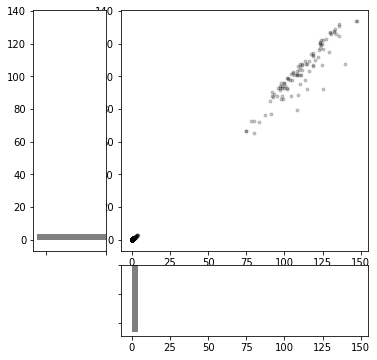

In [22]:
x1 = solo_xrp['High']
y1 = solo_xrp['Low']
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
main_ax.plot(x1, y1, 'ok', markersize=3, alpha=0.2)
x_hist.hist(x1, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y1, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

In [23]:
solo_xrp.shape

(2412, 8)

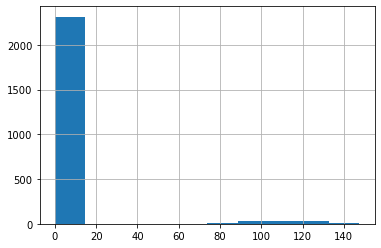

In [24]:
solo_xrp['High'].hist()

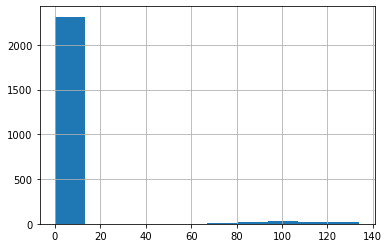

In [25]:
solo_xrp['Low'].hist()

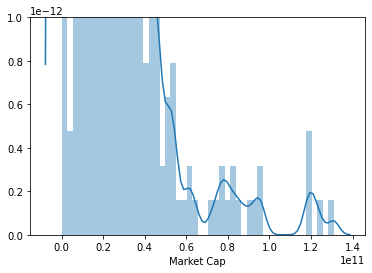

In [26]:
sns.distplot(solo_xrp['Market Cap'])

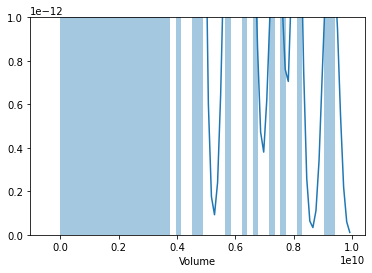

In [27]:
sns.distplot(solo_xrp['Volume'])

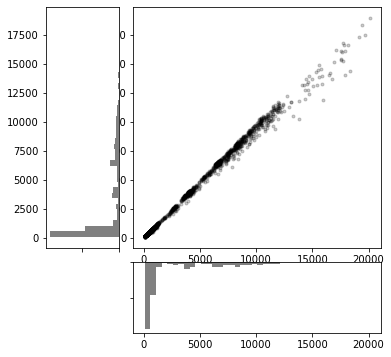

In [28]:
x2 = solo_bitcoin['High']
y2 = solo_bitcoin['Low']
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)
main_ax.plot(x2, y2, 'ok', markersize=3, alpha=0.2)
x_hist.hist(x2, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y2, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

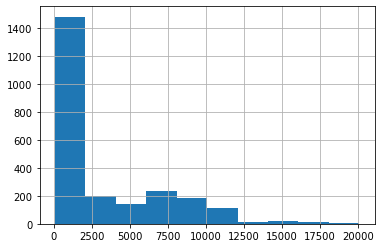

In [29]:
solo_bitcoin['High'].hist()

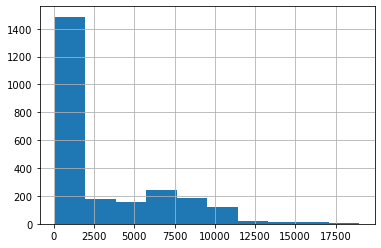

In [30]:
solo_bitcoin['Low'].hist()

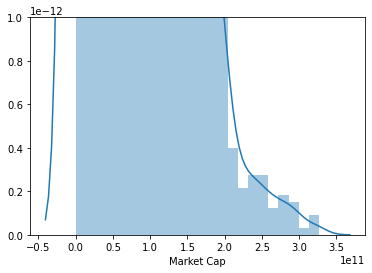

In [31]:
sns.distplot(solo_bitcoin['Market Cap'])

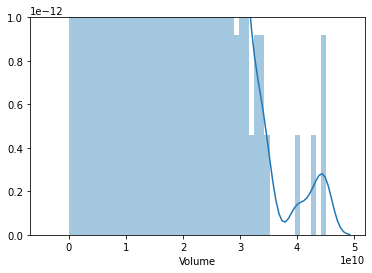

In [32]:
sns.distplot(solo_bitcoin['Volume'])

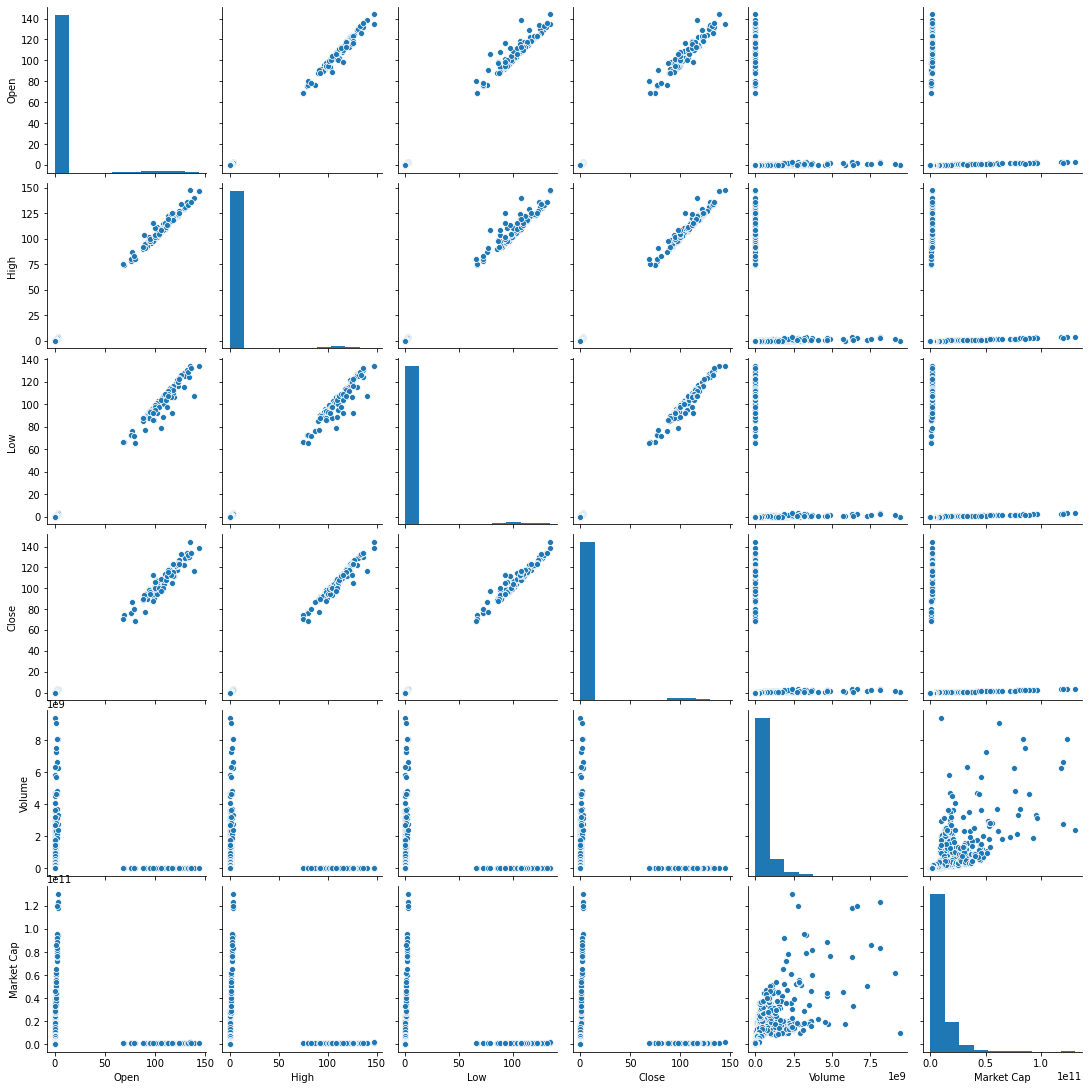

In [81]:
sns.pairplot(solo_xrp[columnas_numericas])

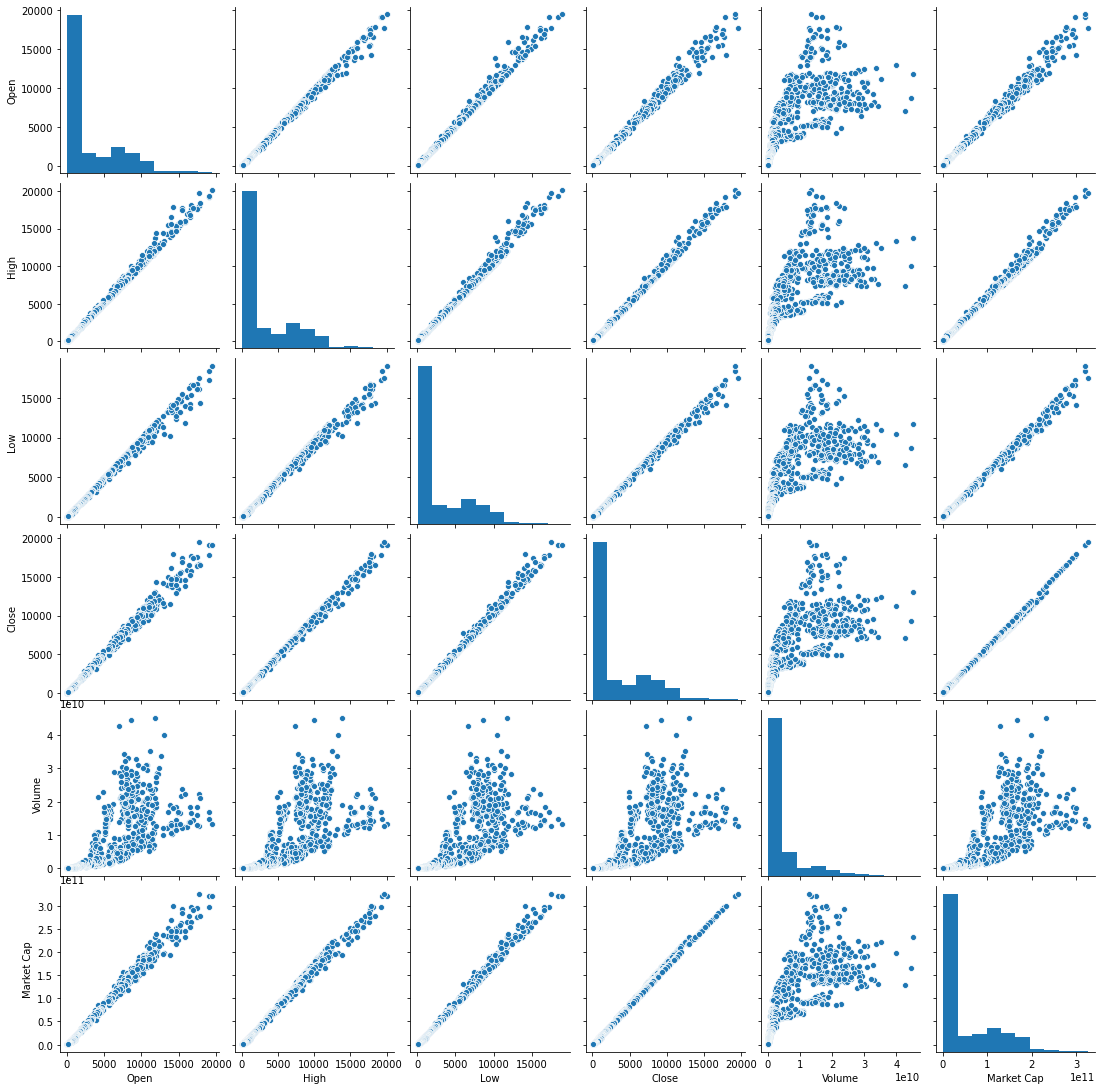

In [79]:
sns.pairplot(solo_bitcoin[columnas_numericas])

### Conjunto de datos sobre la temperatura del aire

In [33]:
df_temp = pd.read_csv("..\Conjuntos de datos\TEMPAIRE_HORA.csv", sep = ',', encoding = 'utf8')

In [34]:
df_temp.head()

,estacionid,fecha,tempaire
0,ABASOLO,2020/07/24 00:00:00,27.5
1,ABASOLO,2020/07/24 01:00:00,27.2
2,ABASOLO,2020/07/24 02:00:00,26.9
3,ABASOLO,2020/07/24 03:00:00,26.4
4,ABASOLO,2020/07/24 04:00:00,25.9


In [35]:
df_temp.shape

(17052, 3)

In [36]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17052 entries, 0 to 17051
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   estacionid  17052 non-null  object 
 1   fecha       17052 non-null  object 
 2   tempaire    17052 non-null  float64
dtypes: float64(1), object(2)
memory usage: 399.8+ KB


In [37]:
df_temp.isnull().any().any()

False

In [38]:
df_temp.replace({' ': np.nan}, inplace = True)

In [39]:
df_temp.replace({'0': np.nan}, inplace = True)

In [40]:
df_temp.replace({0: np.nan}, inplace = True)

In [41]:
list(df_temp['estacionid'].unique())

['ABASOLO',
 'ACAPONETA',
 'ACUGR',
 'AHUALULCOTP',
 'ALTZOMONI',
 'AM2DR',
 'ANGMC',
 'ARGOVIA',
 'ATOYAC',
 'BAABN',
 'BAHIAKINO',
 'BARRETALI',
 'BARRETALII',
 'BASCH',
 'BLORETO',
 'BOCADELRIO',
 'BOCHIL',
 'BTORDO',
 'CABORCA',
 'CALVILLO',
 'CANCUC',
 'CANDIDOAG',
 'CATARINITAS',
 'CATAVINA',
 'CBIDF',
 'CDCCA',
 'CDCUAUHTEMOC',
 'CDEMTYI',
 'CDVALLES',
 'CELYC',
 'CHACAMAX',
 'CHAJL',
 'CHAMELA',
 'CHAYABE',
 'CHICH',
 'CHNCH',
 'CNCQR',
 'CO2QR',
 'COLINA',
 'CONST1857',
 'COSCOMATEPEC',
 'CUXTEPEQUES',
 'DELICIAS',
 'ECOGUARDAS',
 'ELCHICO',
 'ELDIENTE',
 'ELTRIUNFO',
 'ENCRUCIJADA',
 'ESCALONCP',
 'ESCARCEGA',
 'ESCUINTLA',
 'FD2TP',
 'FIMADERO',
 'GAVIOTAS',
 'GCCCH',
 'GOGORRON',
 'HGRANERO',
 'HUEHD',
 'HUIXTAN',
 'HUIXTLA',
 'ILRAYON',
 'IMTMR',
 'IXTLANRIO',
 'IZUPB',
 'JAMAPA',
 'JANOS',
 'JAUMAVE',
 'JIMENEZ2CHIH',
 'JIMENEZCHIH',
 'JMORELOS',
 'JOCJL',
 'KANTUNILKIN',
 'LACVC',
 'LAENCANTADA',
 'LAENCRUCIJADA',
 'LAFLOR',
 'LAPRIMAVERA',
 'LARRAINZAR',
 'LASFLORESII',

In [42]:
len(list(df_temp['estacionid'].unique()))

182

In [43]:
def transformar_fecha(x):
    x = x[:10]
    x = x.replace('/', '-')
    return x

In [44]:
def tranformar_hora(x):
    x = x[11:]
    return x

In [45]:
df_temp['solo_fecha'] = df_temp['fecha'].map(transformar_fecha)

In [46]:
df_temp['solo_hora'] = df_temp['fecha'].map(tranformar_hora)

In [47]:
df_temp.head()

,estacionid,fecha,tempaire,solo_fecha,solo_hora
0,ABASOLO,2020/07/24 00:00:00,27.5,2020-07-24,00:00:00
1,ABASOLO,2020/07/24 01:00:00,27.2,2020-07-24,01:00:00
2,ABASOLO,2020/07/24 02:00:00,26.9,2020-07-24,02:00:00
3,ABASOLO,2020/07/24 03:00:00,26.4,2020-07-24,03:00:00
4,ABASOLO,2020/07/24 04:00:00,25.9,2020-07-24,04:00:00


In [48]:
df_temp['solo_fecha']=pd.to_datetime(df_temp['solo_fecha'])
df_temp['año']  = df_temp['solo_fecha'].map(lambda x:x.year)
df_temp['mes']  = df_temp['solo_fecha'].map(lambda x:x.month)
df_temp['día']  = df_temp['solo_fecha'].map(lambda x:x.day)

In [54]:
df_temp.head()

,estacionid,fecha,tempaire,solo_fecha,solo_hora,año,mes,día
0,ABASOLO,2020/07/24 00:00:00,27.5,2020-07-24,0,2020,7,24
1,ABASOLO,2020/07/24 01:00:00,27.2,2020-07-24,1,2020,7,24
2,ABASOLO,2020/07/24 02:00:00,26.9,2020-07-24,2,2020,7,24
3,ABASOLO,2020/07/24 03:00:00,26.4,2020-07-24,3,2020,7,24
4,ABASOLO,2020/07/24 04:00:00,25.9,2020-07-24,4,2020,7,24


In [50]:
len(list(df_temp['solo_fecha'].unique()))

1

In [53]:
df_temp['solo_hora'] = df_temp['solo_hora'].map(lambda x:int(x[:2]))

In [55]:
len(list(df_temp['solo_hora'].unique()))

24

In [57]:
df_temp['tempaire'].describe()

count    17052.000000
mean        24.117495
std          7.513135
min          1.800000
25%         19.000000
50%         24.800000
75%         29.700000
max         59.600000
Name: tempaire, dtype: float64

In [63]:
df_temp.groupby('estacionid').count()

,fecha,tempaire,solo_fecha,solo_hora,año,mes,día
estacionid,,,,,,,
ABASOLO,19,19,19,19,19,19,19
ACAPONETA,108,108,108,108,108,108,108
ACUGR,113,113,113,113,113,113,113
AHUALULCOTP,19,19,19,19,19,19,19
ALTZOMONI,109,109,109,109,109,109,109
...,...,...,...,...,...,...,...
VILLAOCAMPO,110,110,110,110,110,110,110
VTACANA,41,41,41,41,41,41,41
YC2SO,106,106,106,106,106,106,106


In [64]:
y = df_temp['tempaire']
x = df_temp['solo_hora']

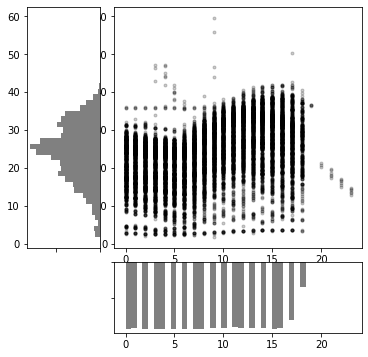

In [65]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

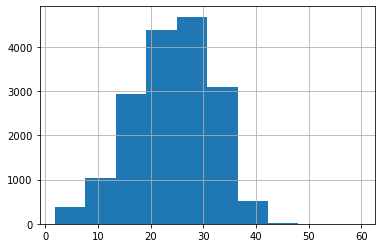

In [66]:
df_temp['tempaire'].hist()

Text(0, 0.5, 'temperatura del aire')

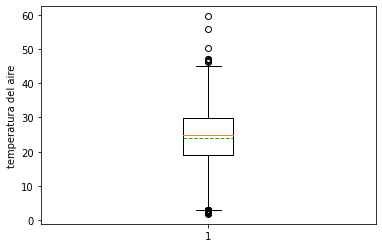

In [67]:
plt.boxplot(df_temp['tempaire'], showmeans=True, meanline=True)
plt.ylabel('temperatura del aire')

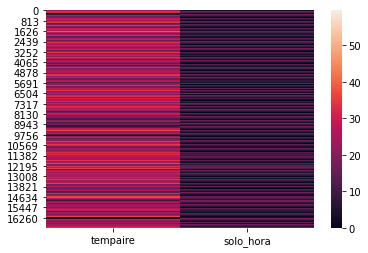

In [69]:
sns.heatmap(df_temp[['tempaire', 'solo_hora']])

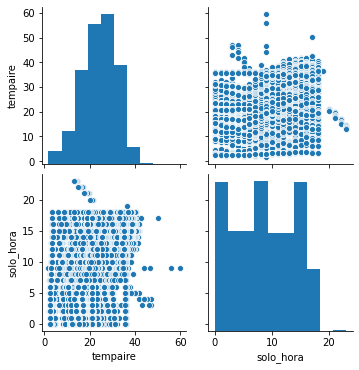

In [75]:
g = sns.pairplot(df_temp[['tempaire', 'solo_hora']])

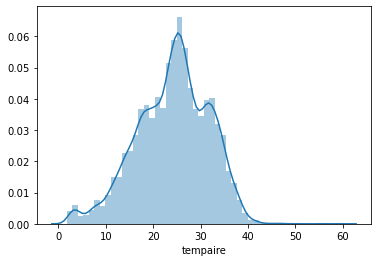

In [77]:
sns.distplot(df_temp['tempaire'])

### Conjunto de datos acerca del rendimiento de conbustible y emisión de contaminantes de los autos vendidos en México hasta el 2018

In [83]:
df_aut  = pd.read_csv("..\Conjuntos de datos\Consumo_Gasolina_Autos_Ene_2018.csv", sep = ',', encoding = 'latin')

In [103]:
df_aut.head()

,Marca,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire,Transmision_
0,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (CVT),2015,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,5,10,9,Automática
1,FORD,FUSION,HIBRIDO 4PTS 2.0L 4CIL 188HP AUT (eCVT),2016,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,27.44,28.57,28.93,21.70,107,0,10,9,Automática
2,FORD,FUSION,HIBRIDO 4X2 4PTAS 2.0L 4CIL 141(+47e)HP E-CVT,2017,CVT,Gasolina,4,188,2.0,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123,2,10,9,Automática
3,FORD,FUSION,HIBRIDO 4PTAS 2.0L 4CIL 188HP AUT eCVT,2018,AUT,Gasolina,4,188,2.0,AUTOS COMPACTOS,25.62,24.77,25.23,18.92,123,2,10,9,Automática
4,FORD,FUSION,HYBRID 4PTS 2.5L 4CIL 156HP CVT,2011,CVT,Gasolina,4,156,2.5,AUTOS COMPACTOS,24.00,21.90,23.01,17.26,135,5,9,9,Automática


In [102]:
marcas = list(df_aut['Marca'].unique())

In [89]:
marcas

['FORD',
 'HONDA',
 'SEAT',
 'MAZDA',
 'CHEVROLET',
 'VW',
 'SUZUKI',
 'NISSAN',
 'HYUNDAI',
 'FIAT',
 'MITSUBISHI',
 'KIA',
 'MERCEDES',
 'DODGE',
 'RENAULT',
 'PEUGEOT',
 'TOYOTA',
 'BMW',
 'AUDI',
 'MINI',
 'SUBARU',
 'INFINITI',
 'VOLVO',
 'ALFA ROMEO',
 'PORSCHE',
 'ACURA',
 'CADILLAC',
 'CHRYSLER',
 'LINCOLN',
 'BUICK',
 'SAAB',
 'LEXUS',
 'JAGUAR',
 'BENTLEY',
 'ROLLSROYCE',
 'MAYBACH',
 'LAMBORGHINI',
 'SMART',
 'LAND ROVER',
 'GML',
 'JEEP',
 'MERCURY',
 'GMC']

In [90]:
len(marcas)

43

In [91]:
submarcas = list(df_aut['Submarca'].unique())

In [92]:
submarcas

['FUSION',
 'CIVIC',
 'CIVIC HIBRIDO',
 'TOLEDO',
 'MAZDA2',
 'CRUZE',
 'GOLF',
 'JETTA',
 'CAVALIER',
 'S-CROSS',
 'SENTRA',
 'MAZDA3',
 'ELANTRA',
 'BEETLE',
 'FOCUS',
 'CX-3',
 'DOBLO',
 'LANCER',
 'VERSA',
 'TIIDA',
 'SOUL',
 'JUKE',
 'MALIBU',
 'A 200',
 'CITY',
 'VISION',
 'CLASICO',
 'FIT',
 'DART',
 'MAZDA6',
 'B 180',
 'A180',
 'A200',
 'FORTE',
 'STEPWAY',
 'OPTIMA',
 'B180',
 'ASX',
 'CLÁSICO',
 'GRAND RAID',
 'A 250',
 'SX4',
 'A250',
 'HR-V',
 'MAZDA 2',
 'JETTA MKVI',
 'MAZDA5',
 'MAZDA 6',
 'COROLLA',
 'CALIBER',
 'AVENGER',
 '301',
 'MATRIX',
 '307',
 '308',
 'B200',
 'LINEA',
 'MAZDA 3',
 'A 45',
 '207',
 'AVANZA',
 'TAURUS (POLICE INTERCEPTOR)',
 'FUSION SPORT',
 'FLUENCE',
 'POLICE INTERCEPTOR',
 'VOLT',
 'PRIUS HIBRIDO',
 'PRIUS',
 '335iA',
 'A4',
 'A3',
 'i8',
 'R8',
 'COOPER',
 'A1',
 '318iA',
 '218iA',
 'IMPREZA',
 'CLS350',
 'X1',
 'Q50',
 'ALTIMA',
 'CLA200',
 '330iA',
 '320iA',
 'TT',
 'LEGACY',
 '430iA',
 'V40',
 '220iA',
 'XV',
 'GIULIETTA',
 'MITO',
 '420iA

In [93]:
len(submarcas)

544

In [96]:
list(df_aut.columns)

['Marca',
 'Submarca',
 'Versión',
 'Modelo',
 'Trans.',
 'Comb.',
 'Cilindros',
 'Potencia (HP)',
 'Tamaño (L)',
 'Categoría',
 'R. Ciudad (km/l)',
 'R. Carr. (km/l)',
 'R. Comb. (km/l)',
 'R. Ajust. (km/l)',
 'CO2(g/km)',
 'NOx (g/1000km)',
 'Calificación Gas Ef. Inv.',
 'Calificación Contam. Aire']

In [118]:
vars_num = ['Cilindros',
 'Potencia (HP)',
 'Tamaño (L)',
 'R. Ciudad (km/l)',
 'R. Carr. (km/l)',
 'R. Comb. (km/l)',
 'R. Ajust. (km/l)',
 'CO2(g/km)',
 'NOx (g/1000km)',
 'Calificación Gas Ef. Inv.',
 'Calificación Contam. Aire']

In [119]:
list(df_aut['Trans.'].unique())

['CVT',
 'AUT',
 'MAN',
 'DSG',
 'TIPT',
 'TIPTRONIC',
 'M6',
 'M5',
 nan,
 'DUALOGIC',
 'TIP',
 'MULTITRONIC',
 'MULTIT',
 'STRONIC',
 'S TRONIC',
 'S TRONIC 7',
 'MAN 6',
 'PDK',
 'DCT',
 'G TRONIC',
 'TIP 8',
 'R TRONIC',
 'ZF SPEED QUICKSHIFT',
 'DKG',
 'ASG']

In [120]:
def transmision(x):
    if x != 'MAN':
        return 'Automática'
    else:
        return 'Manual'

In [121]:
df_aut['Transmision_'] = df_aut['Trans.'].map(transmision)

In [122]:
df_aut.isnull().any().any()

True

In [130]:
df_aut.replace({'0': np.nan}, inplace = True)
df_aut.replace({0: np.nan}, inplace = True)
df_aut.replace({' ': np.nan}, inplace = True)
df_aut.replace({'?': np.nan}, inplace = True)

In [131]:
df_aut.isnull().any().any()

True

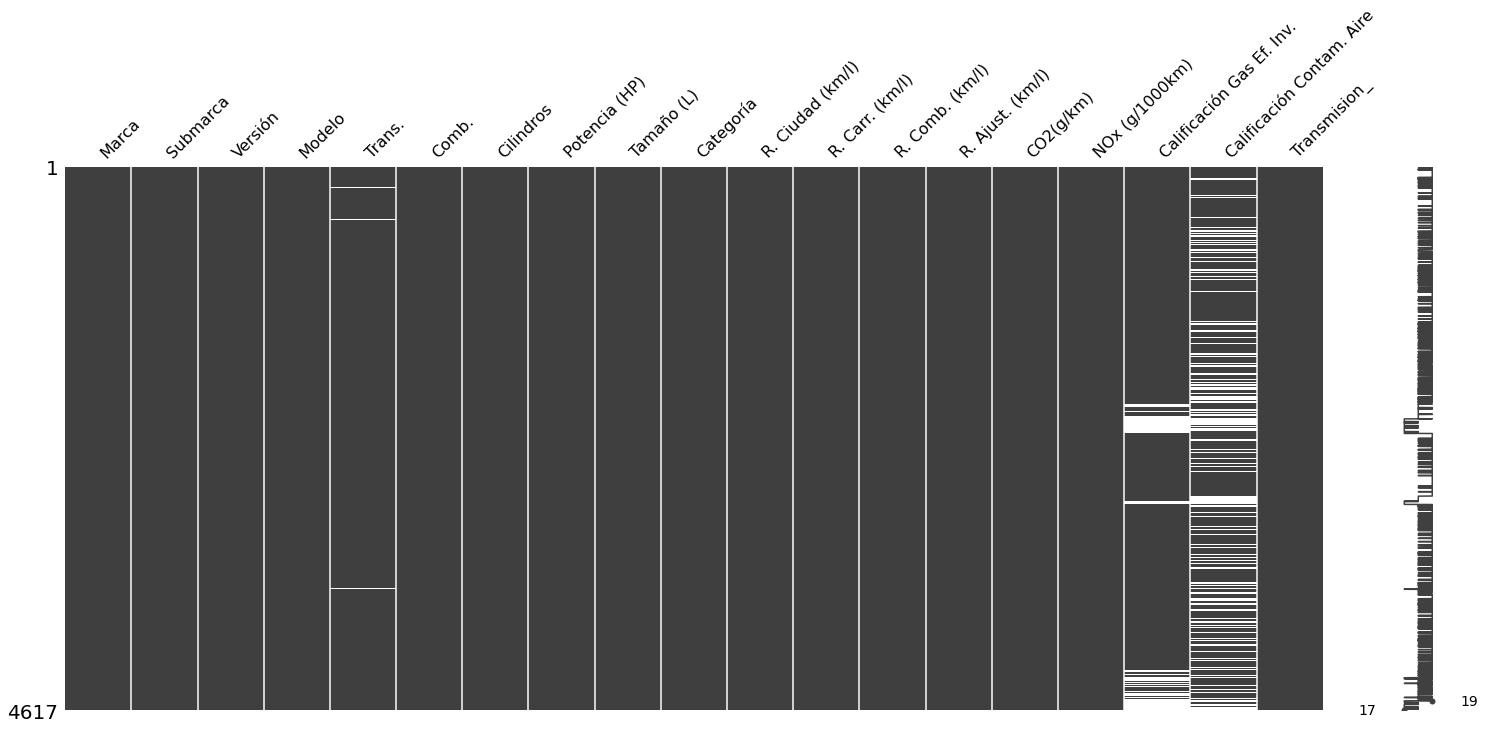

In [132]:
msno.matrix(df_aut)

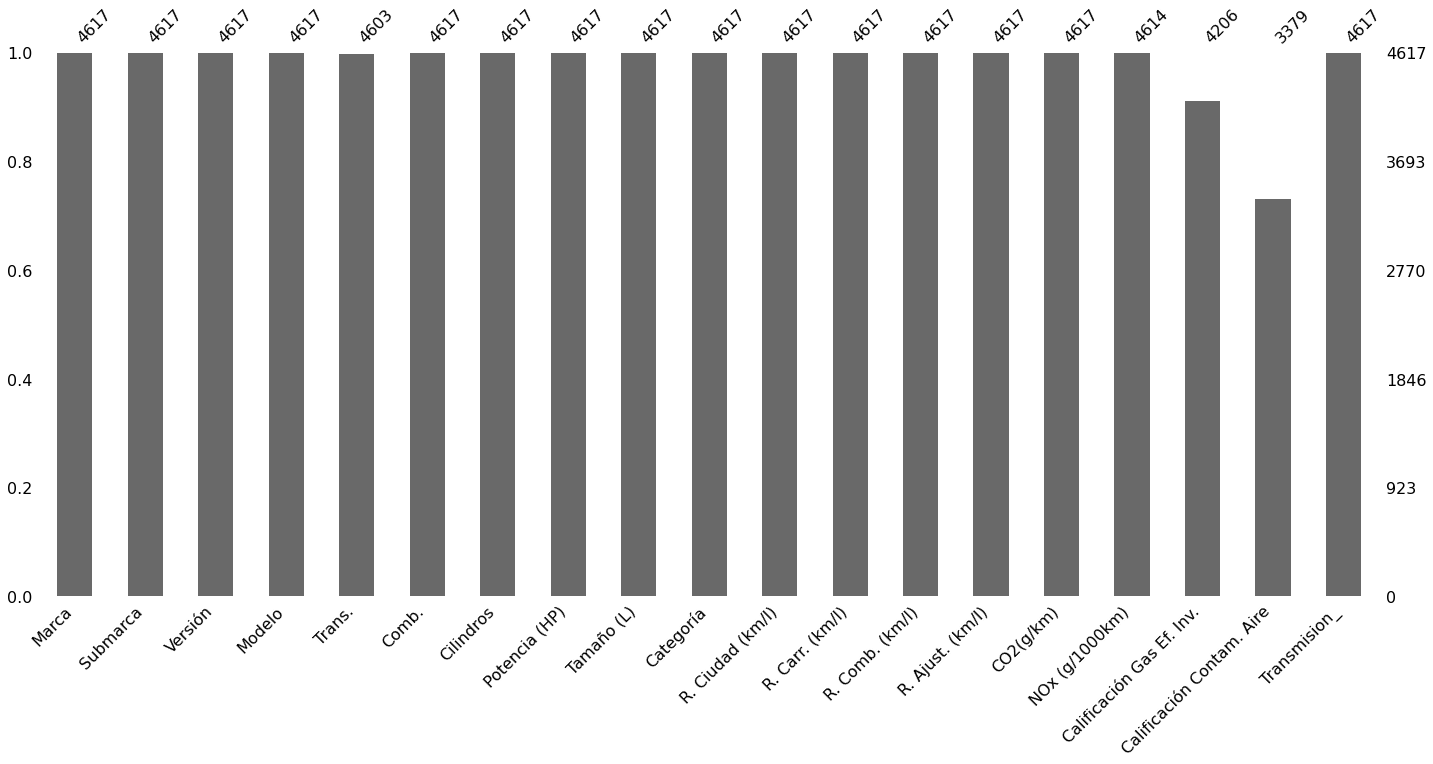

In [133]:
msno.bar(df_aut)

In [134]:
df_aut.columns[df_aut.isnull().any().tolist()]

Index(['Trans.', 'NOx (g/1000km)', 'Calificación Gas Ef. Inv.',
       'Calificación Contam. Aire'],
      dtype='object')

In [140]:
df_aut.dtypes

Marca                         object
Submarca                      object
Versión                       object
Modelo                        object
Trans.                        object
Comb.                         object
Cilindros                    float64
Potencia (HP)                float64
Tamaño (L)                   float64
Categoría                     object
R. Ciudad (km/l)             float64
R. Carr. (km/l)              float64
R. Comb. (km/l)              float64
R. Ajust. (km/l)             float64
CO2(g/km)                    float64
NOx (g/1000km)               float64
Calificación Gas Ef. Inv.    float64
Calificación Contam. Aire    float64
Transmision_                  object
dtype: object

In [136]:
df_aut[vars_num]  = df_aut[vars_num].astype(float)

In [139]:
df_aut['Modelo'] = df_aut['Modelo'].astype(str)

In [145]:
df_aut.groupby('Marca').count()

,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),Categoría,R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire,Transmision_
Marca,,,,,,,,,,,,,,,,,,
ACURA,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,67,52,67
ALFA ROMEO,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,15,5,17
AUDI,424,424,424,424,424,424,424,424,424,424,424,424,424,424,424,389,339,424
BENTLEY,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,3,50,50
BMW,267,267,267,267,267,267,267,267,267,267,267,267,267,267,267,245,139,267
BUICK,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
CADILLAC,77,77,77,77,77,77,77,77,77,77,77,77,77,77,77,57,77,77
CHEVROLET,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,288,289,296
CHRYSLER,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32


In [146]:
df_aut.groupby('Categoría').count()

,Marca,Submarca,Versión,Modelo,Trans.,Comb.,Cilindros,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire,Transmision_
Categoría,,,,,,,,,,,,,,,,,,
AUTOS COMPACTOS,726,726,726,726,718,726,726,726,726,726,726,726,726,726,725,726,613,726
AUTOS DE LUJO,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1539,1360,1018,1539
AUTOS DEPORTIVOS,603,603,603,603,603,603,603,603,603,603,603,603,603,603,601,566,473,603
AUTOS SUBCOMPACTOS,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,497,371,497
CAMIONETAS DE USO MULTIPLE (SUV),1252,1252,1252,1252,1246,1252,1252,1252,1252,1252,1252,1252,1252,1252,1252,1057,904,1252


In [151]:
t = df_aut.groupby(['Marca', 'Categoría']).count()
t

Submarca  Versión  Modelo  \
Marca      Categoría                                                     
ACURA      AUTOS DE LUJO                           44       44      44   
           AUTOS DEPORTIVOS                         1        1       1   
           CAMIONETAS DE USO MULTIPLE (SUV)        22       22      22   
ALFA ROMEO AUTOS DE LUJO                           12       12      12   
           AUTOS DEPORTIVOS                         5        5       5   
...                                               ...      ...     ...   
VW         AUTOS COMPACTOS                        128      128     128   
           AUTOS DE LUJO                           30       30      30   
           AUTOS DEPORTIVOS                         8        8       8   
           AUTOS SUBCOMPACTOS                      64       64      64   
           CAMIONETAS DE USO MULTIPLE (SUV)        89       89      89   

                                             Trans.  Comb.  Cilindros  \
Marca      Categoría                                                    
ACURA      AUTOS DE LUJO                         44     44         44   
           AUTOS DEPORTIVOS                       1      1          1   
           CAMIONETAS DE USO MULTIPLE (SUV)      22     22         22   
ALFA ROMEO AUTOS DE LUJO                         12     12         12   
           AUTOS DEPORTIVOS                       5      5          5   
...                                             ...    ...        ...   
VW         AUTOS COMPACTOS                      128    128        128   
           AUTOS DE LUJO                         30     30         30   
           AUTOS DEPORTIVOS                       8      8          8   
           AUTOS SUBCOMPACTOS                    64     64         64   
           CAMIONETAS DE USO MULTIPLE (SUV)      89     89         89   

                                             Potencia (HP)  Tamaño (L)  \
Marca      Categoría                                                     
ACURA      AUTOS DE LUJO                                44          44   
           AUTOS DEPORTIVOS                              1           1   
           CAMIONETAS DE USO MULTIPLE (SUV)             22          22   
ALFA ROMEO AUTOS DE LUJO                                12          12   
           AUTOS DEPORTIVOS                              5           5   
...                                                    ...         ...   
VW         AUTOS COMPACTOS                             128         128   
           AUTOS DE LUJO                                30          30   
           AUTOS DEPORTIVOS                              8           8   
           AUTOS SUBCOMPACTOS                           64          64   
           CAMIONETAS DE USO MULTIPLE (SUV)             89          89   

                                             R. Ciudad (km/l)  \
Marca      Categoría                                            
ACURA      AUTOS DE LUJO                                   44   
           AUTOS DEPORTIVOS                                 1   
           CAMIONETAS DE USO MULTIPLE (SUV)                22   
ALFA ROMEO AUTOS DE LUJO                                   12   
           AUTOS DEPORTIVOS                                 5   
...                                                       ...   
VW         AUTOS COMPACTOS                                128   
           AUTOS DE LUJO                                   30   
           AUTOS DEPORTIVOS                                 8   
           AUTOS SUBCOMPACTOS                              64   
           CAMIONETAS DE USO MULTIPLE (SUV)                89   

                                             R. Carr. (km/l)  R. Comb. (km/l)  \
Marca      Categoría                                                            
ACURA      AUTOS DE LUJO                                  44               44   
           AUTOS DEPORTIVOS                                1                1   

In [155]:
df_aut.groupby(['Categoría', 'Transmision_']).count()

Marca  Submarca  Versión  \
Categoría                        Transmision_                             
AUTOS COMPACTOS                  Automática      445       445      445   
                                 Manual          281       281      281   
AUTOS DE LUJO                    Automática     1377      1377     1377   
                                 Manual          162       162      162   
AUTOS DEPORTIVOS                 Automática      331       331      331   
                                 Manual          272       272      272   
AUTOS SUBCOMPACTOS               Automática      221       221      221   
                                 Manual          276       276      276   
CAMIONETAS DE USO MULTIPLE (SUV) Automática     1077      1077     1077   
                                 Manual          175       175      175   

                                               Modelo  Trans.  Comb.  \
Categoría                        Transmision_                          
AUTOS COMPACTOS                  Automática       445     437    445   
                                 Manual           281     281    281   
AUTOS DE LUJO                    Automática      1377    1377   1377   
                                 Manual           162     162    162   
AUTOS DEPORTIVOS                 Automática       331     331    331   
                                 Manual           272     272    272   
AUTOS SUBCOMPACTOS               Automática       221     221    221   
                                 Manual           276     276    276   
CAMIONETAS DE USO MULTIPLE (SUV) Automática      1077    1071   1077   
                                 Manual           175     175    175   

                                               Cilindros  Potencia (HP)  \
Categoría                        Transmision_                             
AUTOS COMPACTOS                  Automática          445            445   
                                 Manual              281            281   
AUTOS DE LUJO                    Automática         1377           1377   
                                 Manual              162            162   
AUTOS DEPORTIVOS                 Automática          331            331   
                                 Manual              272            272   
AUTOS SUBCOMPACTOS               Automática          221            221   
                                 Manual              276            276   
CAMIONETAS DE USO MULTIPLE (SUV) Automática         1077           1077   
                                 Manual              175            175   

                                               Tamaño (L)  R. Ciudad (km/l)  \
Categoría                        Transmision_                                 
AUTOS COMPACTOS                  Automática           445               445   
                                 Manual               281               281   
AUTOS DE LUJO                    Automática          1377              1377   
                                 Manual               162               162   
AUTOS DEPORTIVOS                 Automática           331               331   
                                 Manual               272               272   
AUTOS SUBCOMPACTOS               Automática           221               221   
                                 Manual               276               276   
CAMIONETAS DE USO MULTIPLE (SUV) Automática          1077              1077   
                                 Manual               175               175   

                                               R. Carr. (km/l)  \
Categoría                        Transmision_                    
AUTOS COMPACTOS                  Automática                445   
                                 Manual                    281   
AUTOS DE LUJO                    Automática               1377   
                                 Manual                    162   
AUTOS DEPORTIVOS                 Au

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E6AF5457F0>,
      dtype=object)

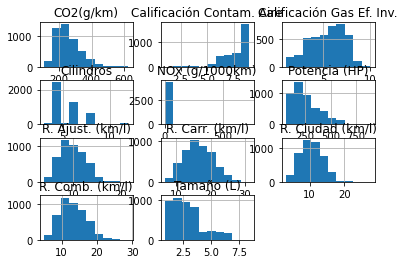

In [158]:
df_aut[vars_num].hist()

In [159]:
df_aut[vars_num].describe()

,Cilindros,Potencia (HP),Tamaño (L),R. Ciudad (km/l),R. Carr. (km/l),R. Comb. (km/l),R. Ajust. (km/l),CO2(g/km),NOx (g/1000km),Calificación Gas Ef. Inv.,Calificación Contam. Aire
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.00000,4614.000000,4206.000000,3379.000000
mean,5.329218,254.991553,2.870674,10.604934,16.612749,13.183803,9.887754,256.53368,30.823580,5.362577,7.895531
std,1.800226,132.791017,1.348382,3.285876,4.186279,3.603346,2.702537,75.57912,56.914718,2.053625,1.432529
min,3.000000,60.000000,0.900000,3.100000,6.700000,4.960000,3.720000,107.00000,1.000000,1.000000,1.000000
25%,4.000000,150.000000,1.800000,8.200000,13.480000,10.460000,7.850000,200.00000,10.000000,4.000000,7.000000
50%,4.000000,220.000000,2.500000,10.420000,16.390000,12.870000,9.650000,243.00000,17.000000,6.000000,9.000000
75%,6.000000,330.000000,3.600000,12.810000,19.600000,15.610000,11.710000,299.00000,28.000000,7.000000,9.000000
max,12.000000,888.000000,8.400000,27.460000,31.300000,28.930000,21.700000,627.00000,724.000000,10.000000,9.000000


Text(0, 0.5, 'R. Ciudad (km/l)')

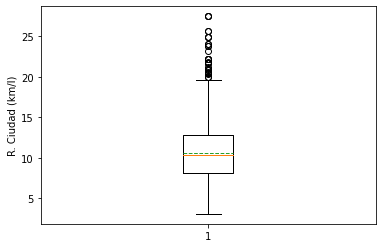

In [160]:

plt.boxplot(df_aut['R. Ciudad (km/l)'], showmeans=True, meanline=True)
plt.ylabel('R. Ciudad (km/l)')


Text(0, 0.5, 'RCO2(g/km)')

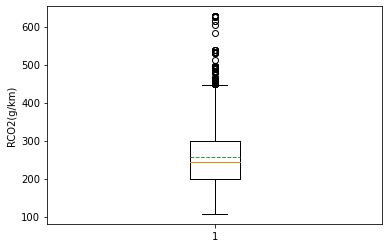

In [164]:
plt.boxplot(df_aut['CO2(g/km)'], showmeans=True, meanline=True)
plt.ylabel('RCO2(g/km)')


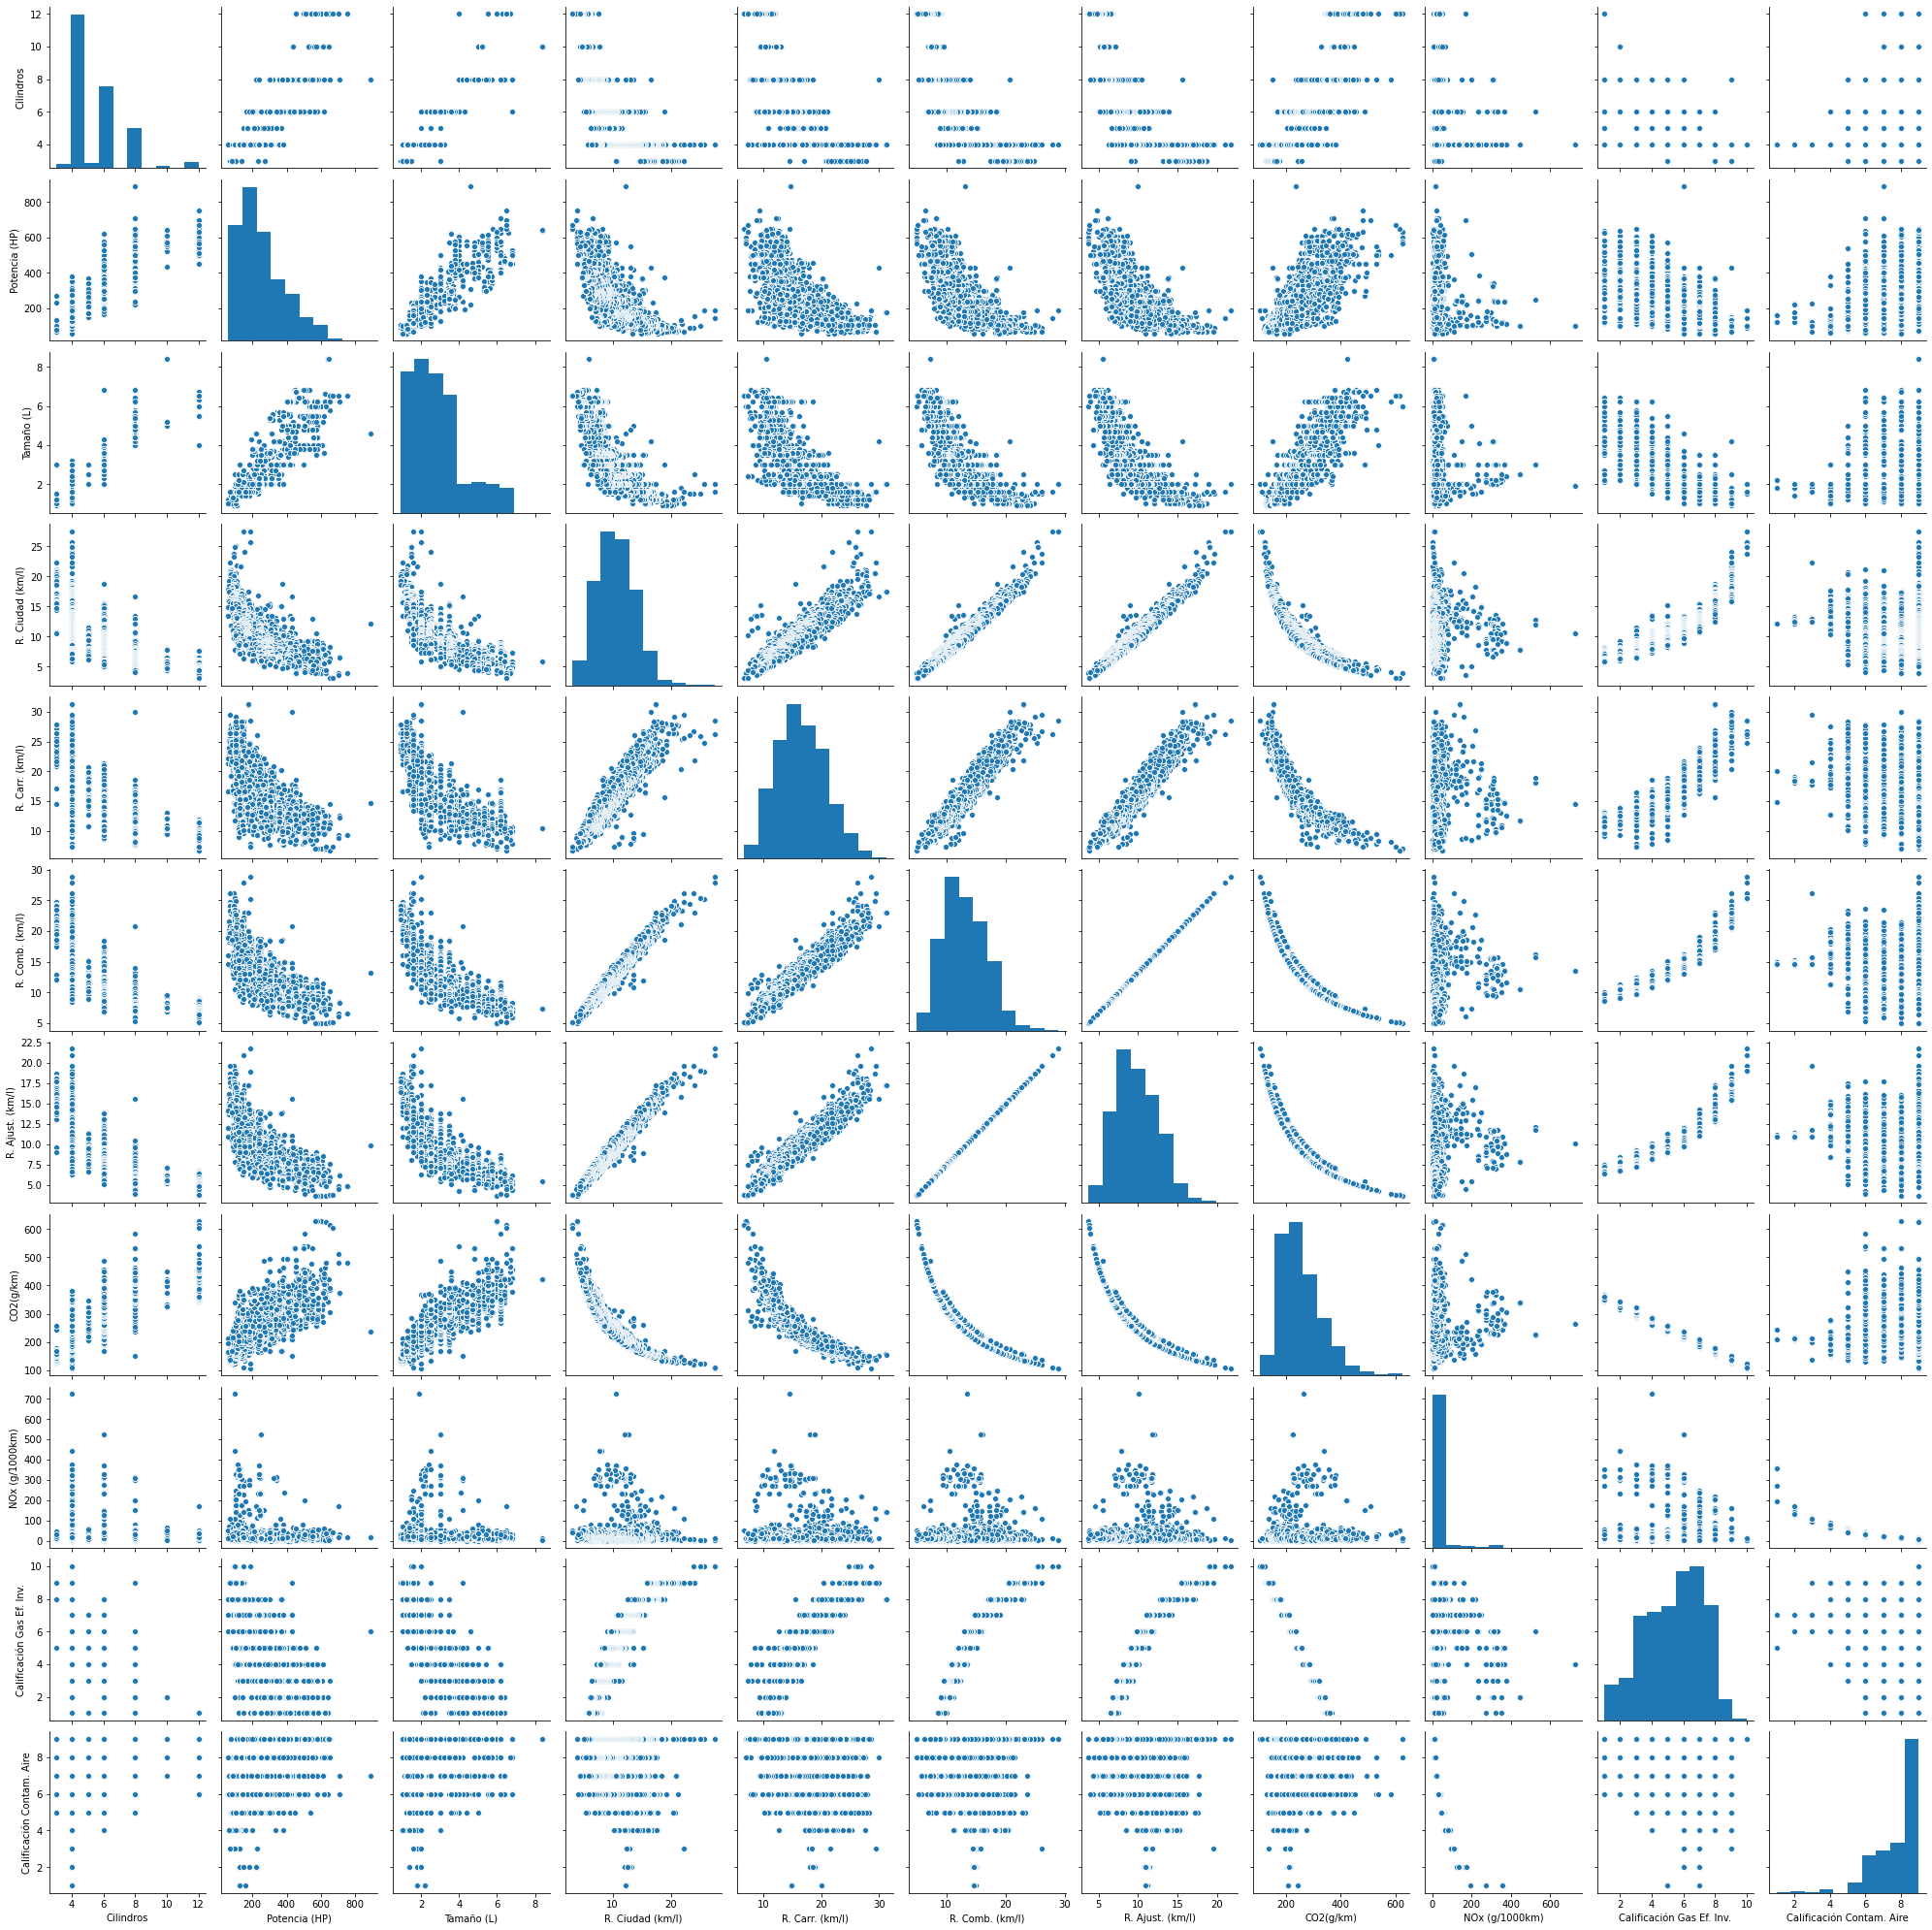

In [166]:
sns.pairplot(df_aut[vars_num])